In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [755]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [756]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
room_occupancy_estimation = fetch_ucirepo(id=864) 
  
# data (as pandas dataframes) 
X = room_occupancy_estimation.data.features 
y = room_occupancy_estimation.data.targets 


In [757]:
#Dataset
X.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


In [758]:
#Size and shape
print('Number of rows:',X.shape[0])
print('Number of columns:',X.shape[1])

Number of rows: 10129
Number of columns: 18


In [759]:
#Number of null values
def find_null_percent(df):
    
    # Creating a data frame with percent of null values in each column
    null_percent = (df.isnull().mean()*100).reset_index().rename(columns = {'index': 'column_name', 0:'percent_of_null_values'})
    return null_percent

find_null_percent(X)

,column_name,percent_of_null_values
0,Date,0.0
1,Time,0.0
2,S1_Temp,0.0
3,S2_Temp,0.0
4,S3_Temp,0.0
5,S4_Temp,0.0
6,S1_Light,0.0
7,S2_Light,0.0
8,S3_Light,0.0
9,S4_Light,0.0


We have no null values in our dataset

In [760]:
X.dtypes

Date             object
Time             object
S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
dtype: object

In [761]:
(X.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [762]:
X.nunique()

Date                7
Time            10129
S1_Temp            24
S2_Temp            69
S3_Temp            29
S4_Temp            27
S1_Light           68
S2_Light           82
S3_Light          177
S4_Light           75
S1_Sound          231
S2_Sound          185
S3_Sound          258
S4_Sound          106
S5_CO2            186
S5_CO2_Slope     1579
S6_PIR              2
S7_PIR              2
dtype: int64

Lets explore date and time to understand the data distribution and how it might affect our result

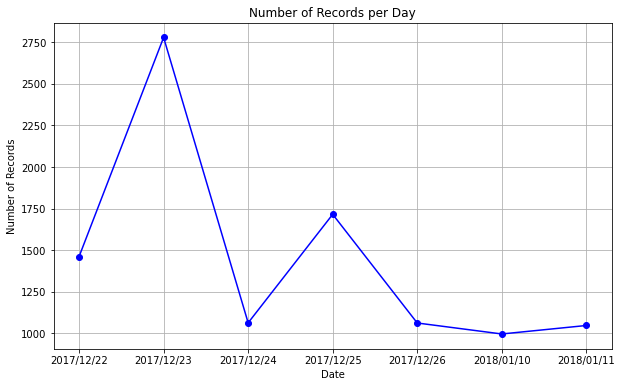

In [763]:
# Group by date and count the number of records for each day
daily_counts = X.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

In [764]:
#Categorizing time of the day
X['datetime'] = pd.to_datetime(X['Date'] +' '+ X['Time'])

# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Extract hour from datetime column and apply categorize_time_of_day function
X['time_of_day'] = X['datetime'].dt.hour.apply(categorize_time_of_day)

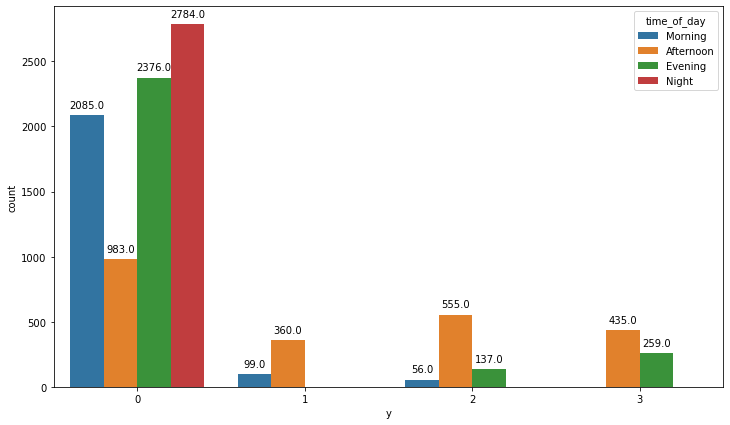

In [765]:
X['y'] = y['Room_Occupancy_Count']
#Classification of records based on time of day
plt.figure(figsize=(12,7))
ax = sns.countplot(data = X,x = 'y', hue = 'time_of_day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [766]:
one_hot_encoded = pd.get_dummies(X['time_of_day'])

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, one_hot_encoded], axis=1)

X

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2_Slope,S6_PIR,S7_PIR,datetime,time_of_day,y,Afternoon,Evening,Morning,Night
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.769231,0,0,2017-12-22 10:49:41,Morning,1,0,0,1,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.646154,0,0,2017-12-22 10:50:12,Morning,1,0,0,1,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.519231,0,0,2017-12-22 10:50:42,Morning,1,0,0,1,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.388462,0,0,2017-12-22 10:51:13,Morning,1,0,0,1,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.253846,0,0,2017-12-22 10:51:44,Morning,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0.000000,0,0,2018-01-11 08:58:07,Morning,0,0,0,1,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0.000000,0,0,2018-01-11 08:58:37,Morning,0,0,0,1,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0.000000,0,0,2018-01-11 08:59:08,Morning,0,0,0,1,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0.000000,0,0,2018-01-11 08:59:39,Morning,0,0,0,1,0


In [767]:
X['y'] = pd.DataFrame(np.where(X['y'] > 0, 1, -1))

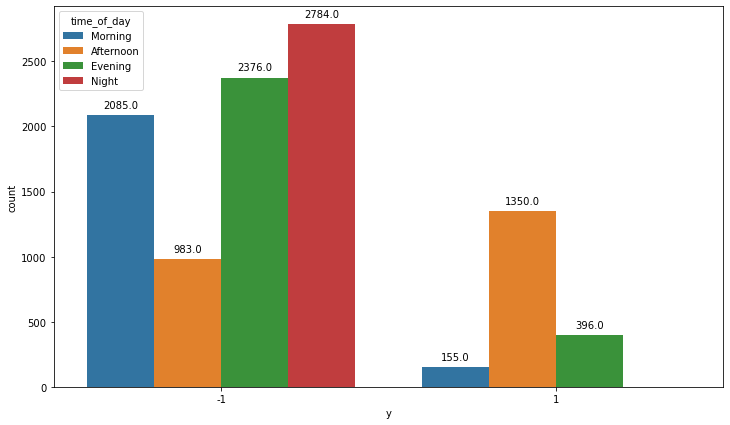

In [770]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data = X,x = 'y', hue = 'time_of_day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

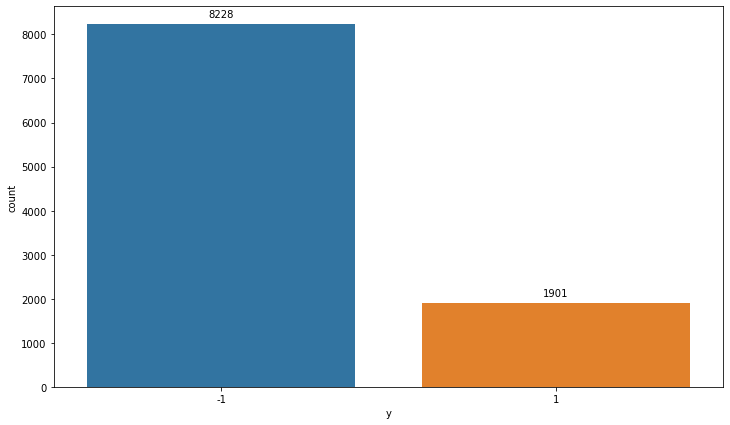

In [771]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data = X,x = 'y')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [774]:
X_under_sampled = X.sample(n=1901)

In [775]:
X_under_sampled = X_under_sampled.drop(columns = ['datetime','Date','Time','time_of_day'])

In [776]:
X_under_sampled.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,y,Afternoon,Evening,Morning,Night
6585,25.44,25.44,25.13,26.00,0,0,0,0,0.08,0.05,...,0.10,350,-0.042308,0,0,-1,0,1,0,0
4703,25.25,25.25,24.69,25.56,0,0,0,0,0.07,0.05,...,0.06,360,0.000000,0,0,-1,0,0,0,1
3456,26.19,25.81,25.69,26.31,117,23,189,11,1.13,0.31,...,0.23,700,2.511538,0,0,1,1,0,0,0
7105,25.38,25.38,24.94,25.81,0,0,0,0,0.07,0.05,...,0.09,355,0.000000,0,0,-1,0,0,0,1
8843,25.31,25.38,25.00,25.50,0,0,0,0,0.07,0.04,...,0.09,360,-0.046154,0,0,-1,0,1,0,0


In [779]:
y_under_sampled = X_under_sampled['y']

In [781]:
pd.DataFrame(y_under_sampled.head())

,y
6585,-1
4703,-1
3456,1
7105,-1
8843,-1


In [749]:
class SVM:
    
    def __init__(self, learning_rate = 0.00001, lambda_ = 0.001, max_iterations = 50):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iterations = max_iterations
     
    def add_X0(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    def normalize_testdata(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X = (X-self.mean) / self.std
        X = self.add_X0(X)
        return X
    
    def normalize_traindata(self, X):
        X = (X-self.mean) / self.std
        X = self.add_X0(X)
        return X
    
    def fit(self, X, y):
        #n = X.shape[0]
        #Choose one vs all conditions here
        y = pd.DataFrame(np.where(y > 0, 1, -1))
        X = pd.DataFrame(self.normalize_testdata(X))
    
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for r in range(0, self.max_iterations):
            for i in range(1, X.shape[0]):
                condition = y.iloc[(i-1):i,:].values * (np.dot(X.iloc[(i-1):i,:].values, self.w) + b)
                #print(condition[0][0])
                if condition[0][0]>= 1:
                    self.w = self.w - self.learning_rate * (2 * self.lambda_ * self.w)
                else:
                    self.w = self.w - self.learning_rate * (2 * self.lambda_ * self.w - 
                                                            np.matmul((X.iloc[(i-1):i,:].values).T,
                                                                      y.iloc[(i-1):i,:].values))
                    self.b = self.b - self.learning_rate * (-y.iloc[(i-1):i,:].values)
        self.w = [sub_arr[0] for sub_arr in self.w] 
        print(pd.DataFrame(self.w))
        
    def predict(self, X, y):
        X = self.normalize_traindata(X)
        y = pd.DataFrame(np.where(y > 0, 1, -1))
        pred = np.dot(self.w, X.T) + self.b
        #self.evaluate(y, pred)
        return np.sign(pred), y
    

In [782]:
trainX, testX, trainY, testY = train_test_split(X_under_sampled, y_under_sampled,test_size = 0.25)

In [783]:
m = SVM()

In [784]:
m.fit(trainX, trainY)

           0
0  -0.326698
1   0.101228
2   0.096791
3   0.059125
4   0.026603
5   0.205254
6   0.137014
7   0.135130
8   0.046072
9   0.129648
10  0.106742
11  0.101039
12  0.070728
13  0.091776
14  0.143191
15  0.134400
16  0.122476
17  0.238832
18  0.066570
19 -0.056240
20 -0.001629
21 -0.004795


In [785]:
yHat,testY = m.predict(testX, testY)

In [786]:
precision = precision_score(testY, yHat.T)
recall = recall_score(testY, yHat.T)
accuracy = accuracy_score(testY, yHat.T)
f1 = f1_score(testY, yHat.T)
conf_matrix = confusion_matrix(testY, yHat.T)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[382   2]
 [  1  91]]

Accuracy: 0.9936974789915967
F1 Score: 0.9837837837837838
Precision: 0.978494623655914
Recall: 0.9891304347826086


In [796]:
testY[470:]

,0
470,-1
471,-1
472,1
473,-1
474,-1
475,1


In [797]:
(pd.DataFrame(yHat))[:]

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
